In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [68]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [69]:
df_test.head()

,date,store_id,parent_chain_id,store_country,country_iso_code,region_id,store_region,store_segment,store_activity_name,items_first_enabled_date,...,consumer_cancellation,store_cancellation,item_price,meals_refunded,rating_count,sum_rating_overall,item_view,no_unique_consumers,is_enabled,Département
0,2020-05-01,22,3314.0,France,FR,FR10,Ile-De-France,Supermarket Big,Commercial,2019-06-18,...,0,0,5.99,0,0,0,4,0,True,91
1,2020-05-01,22,3314.0,France,FR,FR10,Ile-De-France,Supermarket Big,Commercial,2019-06-18,...,0,0,3.99,0,0,0,2,0,True,91
2,2020-05-02,22,3314.0,France,FR,FR10,Ile-De-France,Supermarket Big,Commercial,2019-06-18,...,0,0,5.99,0,0,0,4,0,True,91
3,2020-05-02,22,3314.0,France,FR,FR10,Ile-De-France,Supermarket Big,Commercial,2019-06-18,...,0,0,3.99,0,0,0,1,0,True,91
4,2020-05-03,22,3314.0,France,FR,FR10,Ile-De-France,Supermarket Big,Commercial,2019-06-18,...,0,0,5.99,0,0,0,6,0,True,91


In [8]:
df_test.columns.unique()

Index(['store_id', 'parent_chain_id', 'store_country', 'country_iso_code',
       'region_id', 'store_region', 'store_segment', 'store_activity_name',
       'items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'is_enabled', 'Département'],
      dtype='object')

In [13]:
df_train.columns.unique()

Index(['store_id', 'parent_chain_id', 'store_country', 'country_iso_code',
       'region_id', 'store_region', 'store_segment', 'store_activity_name',
       'items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'is_enabled', 'Département',
       'target'],
      dtype='object')

In [70]:
df_total = pd.concat([df_train, df_test])


In [71]:
df_total.shape

(5904582, 34)

In [58]:
#Evolution temporelle des ventes globales quotidiennes :
#Evolution temporelle des ventes globales par semaine :

date
2019-06-02    0
2019-06-03    4
2019-06-04    4
2019-06-05    2
2019-06-06    3
             ..
2020-05-30    0
2020-05-30    0
2020-05-31    0
2020-05-31    0
2020-05-31    0
Name: meals_saved, Length: 5904582, dtype: int64

In [35]:
df_total[df_total.store_id == 4]

,store_id,parent_chain_id,store_country,country_iso_code,region_id,store_region,store_segment,store_activity_name,items_first_enabled_date,store_first_saving_date,...,item_price,meals_refunded,rating_count,sum_rating_overall,item_view,no_unique_consumers,is_enabled,Département,target,saved_ratio
date,,,,,,,,,,,,,,,,,,,,,
2019-06-02,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,0,0,0,0,False,75,0.0,0.0
2019-06-03,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,0,0,0,5,True,75,0.0,inf
2019-06-04,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,1,5,0,4,True,75,0.0,inf
2019-06-05,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,1,5,0,2,True,75,0.0,inf
2019-06-06,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,0,0,0,2,True,75,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,0,0,5,0,True,75,1.0,NaN
2020-03-01,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,0,0,9,0,True,75,1.0,NaN
2020-03-02,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,2019-06-09,...,3.99,0,0,0,15,0,True,75,1.0,NaN


In [44]:
df_total['one'] = '1'

In [45]:
df = df_total.groupby(['store_id']).count()

In [49]:
df1 = df[['one']]
df1

,one
store_id,
4,277
22,366
69,241
71,236
72,235
...,...
76513,36
76565,32
76566,32


In [52]:
df1.sort_values(by = 'one')

,one
store_id,
69983,31
58027,31
43895,31
41299,31
38020,31
...,...
33541,1363
39181,1371
29344,1440


Il s'agit du nombre de lignes par store : chaque ligne étant une date de vente de panier.

### Moyenne de total supply en fonction du temps :

In [156]:
df_mean = df_total[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers']].groupby(['date']).mean()

df_mean_segment = df_total[['date','items_first_enabled_date', 'store_first_saving_date','store_segment',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers']].groupby(['date','store_segment']).mean()

In [157]:
df_mean

,item_id,before_price,total_supply,declared_supply,manual_added_supply,manual_removed_supply,meals_saved,consumer_cancellation,store_cancellation,item_price,meals_refunded,rating_count,sum_rating_overall,item_view,no_unique_consumers
date,,,,,,,,,,,,,,,
2019-01-01,29830.397338,12.695431,0.808614,0.752858,0.119186,-0.035239,0.296789,0.012529,0.028191,4.252938,0.026938,0.073767,0.306343,0.000000,0.253093
2019-01-02,29857.707862,12.695933,2.347496,1.797798,0.801675,-0.144519,1.977981,0.053342,0.107459,4.253072,0.030857,0.521941,2.277717,0.000000,1.667545
2019-01-03,29860.514419,12.705877,2.602791,1.940930,0.870543,-0.130853,2.190388,0.072868,0.077829,4.255825,0.015349,0.612093,2.698295,0.000000,1.839690
2019-01-04,29874.309935,12.726214,2.863314,2.053224,1.036100,-0.147948,2.406973,0.058315,0.078062,4.261666,0.012342,0.670935,2.967757,0.000000,1.977013
2019-01-05,29881.257227,12.724875,2.629927,1.812800,1.001391,-0.119184,2.277632,0.057350,0.065080,4.262527,0.011748,0.643840,2.872005,0.000000,1.827794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27,44706.424957,13.863080,1.596512,0.893117,0.820386,-0.073590,1.408442,0.057075,0.043401,4.582574,0.011362,0.617585,2.728432,22.661448,1.118444
2020-05-28,44711.815023,13.858334,1.560349,0.880954,0.781661,-0.059787,1.385347,0.060316,0.042479,4.585967,0.010108,0.609037,2.693598,24.580564,1.108278
2020-05-29,44702.949901,13.858914,1.632783,0.898017,0.854726,-0.078916,1.438995,0.052148,0.041044,4.575997,0.009650,0.628288,2.778784,22.385195,1.123265


In [102]:
df_mean_segment

item_id  before_price  total_supply  \
date       store_segment                                                      
2019-01-01 Bakery                  29643.774332     11.640463      1.393048   
           Beverages               28154.857143     13.956522      0.392857   
           Buffet                  31400.350000     10.577193      1.716667   
           Butcher                 29844.239130     12.880435      0.500000   
           Cafeteria               29420.763889     11.283712      0.520833   
...                                         ...           ...           ...   
2020-05-31 Supermarket Big         53319.961093     12.964404      0.152318   
           Supermarket Medium      49892.675220     12.246334      0.174853   
           Supermarket Small       43677.109978     12.172989      0.861641   
           Sushi                   37374.879412     15.590882      1.079412   
           Traditional Restaurant  44277.975791     13.626357      0.379888   

                                   declared_supply  manual_added_supply  \
date       store_segment                                                  
2019-01-01 Bakery                         1.386096             0.113904   
           Beverages                      0.392857             0.000000   
           Buffet                         1.500000             0.216667   
           Butcher                        0.413043             0.195652   
           Cafeteria                      0.548611             0.020833   
...                                            ...                  ...   
2020-05-31 Supermarket Big                0.047185             0.146523   
           Supermarket Medium             0.067815             0.112903   
           Supermarket Small              0.348115             0.571175   
           Sushi                          0.726471             0.497059   
           Traditional Restaurant         0.275605             0.113594   

                                   manual_removed_supply  meals_saved  \
date       store_segment                                                
2019-01-01 Bakery                              -0.058824     0.398930   
           Beverages                            0.000000     0.071429   
           Buffet                               0.000000     1.016667   
           Butcher                             -0.108696     0.152174   
           Cafeteria                           -0.048611     0.180556   
...                                                  ...          ...   
2020-05-31 Supermarket Big                     -0.040563     0.144040   
           Supermarket Medium                  -0.004399     0.156525   
           Supermarket Small                   -0.032816     0.755211   
           Sushi                               -0.097059     1.020588   
           Traditional Restaurant               0.000000     0.212291   

                                   consumer_cancellation  store_cancellation  \
date       store_segment                                                       
2019-01-01 Bakery                               0.016043            0.048128   
           Beverages                            0.000000            0.000000   
           Buffet                               0.050000            0.000000   
           Butcher                              0.000000            0.000000   
           Cafeteria                            0.000000            0.000000   
...                                                  ...                 ...   
2020-05-31 Supermarket Big                      0.004139            0.000828   
           Supermarket Medium                   0.005865            0.001466   
           Supermarket Small                    0.021286            0.024834   
           Sushi                                0.064706            0.047059   
           Traditional Restaurant               0.003724            0.009311   

                                   item_price

In [179]:
pd.to_datetime(df_mean.index)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', name='date', length=517, freq=None)

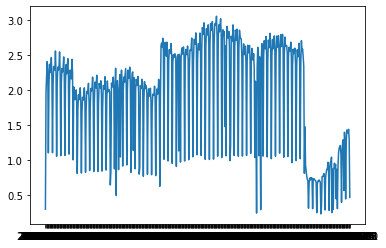

In [161]:
plt.plot(df_mean.index.values, df_mean['meals_saved'])


In [159]:
df_mean['moyenne_mobile'] = df_mean['meals_saved'].rolling(window=7).mean()

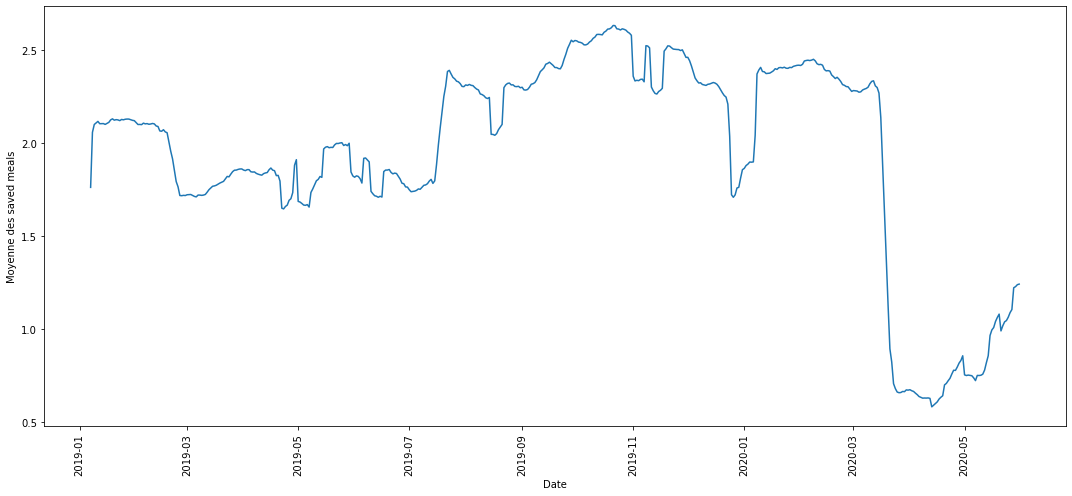

In [180]:
plt.figure(figsize=(15,7)) 

ax = plt.plot(pd.to_datetime(df_mean.index), df_mean['moyenne_mobile']) 
plt.ylabel("Moyenne des saved meals")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()

In [80]:
df_total['store_segment'].unique()

array(['Bakery', 'Supermarket Big', 'Pastry', 'Canteen',
       'Supermarket Small', 'Supermarket Medium', 'Butcher', 'Hotel',
       'Florist', 'Beverages', 'Fast Food / Take away restaurant',
       'Buffet', 'Other Specialists', 'Sushi', 'Other',
       'Fruits & vegetables store', 'Traditional Restaurant', 'Fish shop',
       'Market stall', nan, 'Manufacturer', 'Cafeteria', 'Caterer',
       'Gas station'], dtype=object)

In [125]:
df_boulangerie = df_total.loc[(df_total['store_segment'].isin(['Bakery','Pastry']))]
df_restauration_rapide = df_total.loc[(df_total['store_segment'].isin(['Supermarket Small','Supermarket Medium', 'Butcher','Fruits & vegetables store', 'Fish shop', 'Market stall']))]
df_supermarché = df_total.loc[(df_total['store_segment'].isin(['Canteen','Sushi','Fast Food / Take away restaurant','Traditional Restaurant', 'Cafeteria', 'Caterer']))]
df_hotel = df_total.loc[(df_total['store_segment'].isin(['Hotel']))]
df_autres = df_total.loc[(df_total['store_segment'].isin(['Other','Other Specialists', 'Florist', 'Manufacturer']))]


In [126]:
df_boulangerie

,date,store_id,parent_chain_id,store_country,country_iso_code,region_id,store_region,store_segment,store_activity_name,items_first_enabled_date,...,item_price,meals_refunded,rating_count,sum_rating_overall,item_view,no_unique_consumers,is_enabled,Département,target,dayOfWeek
0,2019-06-02,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,...,3.99,0,0,0,0,0,False,75,0.0,Sunday
1,2019-06-03,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,...,3.99,0,0,0,0,5,True,75,0.0,Monday
2,2019-06-04,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,...,3.99,0,1,5,0,4,True,75,0.0,Tuesday
3,2019-06-05,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,...,3.99,0,1,5,0,2,True,75,0.0,Wednesday
4,2019-06-06,4,NaN,France,FR,FR10,Ile-De-France,Bakery,Commercial,2019-06-03,...,3.99,0,0,0,0,2,True,75,0.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473329,2020-05-30,76805,6449.0,France,FR,FR10,Ile-De-France,Pastry,Commercial,2020-05-18,...,4.99,0,0,0,14,0,True,75,NaN,Saturday
473330,2020-05-30,76805,6449.0,France,FR,FR10,Ile-De-France,Pastry,Commercial,2020-05-18,...,9.50,0,0,0,25,0,True,75,NaN,Saturday
473331,2020-05-31,76805,6449.0,France,FR,FR10,Ile-De-France,Pastry,Commercial,2020-05-18,...,2.99,0,0,0,12,0,True,75,NaN,Sunday
473332,2020-05-31,76805,6449.0,France,FR,FR10,Ile-De-France,Pastry,Commercial,2020-05-18,...,4.99,0,0,0,8,0,True,75,NaN,Sunday


In [113]:
date = pd.DataFrame()
date['date'] = pd.to_datetime(df_total['date'])
date['dayOfWeek'] = date['date'].dt.day_name()
date_day_string=date['dayOfWeek']
date[['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']]=pd.get_dummies(date_day_string)[['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']]
date['weekend'] = date_day_string.isin(['Saturday', 'Sunday']).replace({True: 1, False:0})

In [117]:
df_total['dayOfWeek'] = date['dayOfWeek']

In [119]:
df_mean_week = df_total[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['dayOfWeek']).mean()


**Global :**

In [127]:
df_mean_week['supply_ratio'] = df_mean_week['meals_saved']/df_mean_week['total_supply']
print(df_mean_week['meals_saved'])
print(df_mean_week['supply_ratio'])
print(df_mean_week['total_supply'])

dayOfWeek
Friday       2.182362
Monday       1.929996
Saturday     2.046541
Sunday       0.834486
Thursday     2.080888
Tuesday      2.137741
Wednesday    2.019354
Name: meals_saved, dtype: float64
dayOfWeek
Friday       0.891436
Monday       0.890142
Saturday     0.905097
Sunday       0.870528
Thursday     0.887353
Tuesday      0.894963
Wednesday    0.888594
Name: supply_ratio, dtype: float64
dayOfWeek
Friday       2.448142
Monday       2.168188
Saturday     2.261130
Sunday       0.958598
Thursday     2.345050
Tuesday      2.388635
Wednesday    2.272528
Name: total_supply, dtype: float64


**Boulangerie :**

In [128]:
df_mean_boulangerie_week = df_boulangerie[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['dayOfWeek']).mean()

In [181]:
df_mean_boulangerie = df_boulangerie[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['date']).mean()

In [129]:
df_mean_boulangerie_week['supply_ratio'] = df_mean_boulangerie_week['meals_saved']/df_mean_boulangerie_week['total_supply']
print(df_mean_boulangerie_week['meals_saved'])
print(df_mean_boulangerie_week['supply_ratio'])
print(df_mean_boulangerie_week['total_supply'])

dayOfWeek
Friday       2.475172
Monday       2.106903
Saturday     2.361938
Sunday       1.297772
Thursday     2.429001
Tuesday      2.464382
Wednesday    2.320837
Name: meals_saved, dtype: float64
dayOfWeek
Friday       0.882644
Monday       0.863936
Saturday     0.876831
Sunday       0.867840
Thursday     0.866923
Tuesday      0.877742
Wednesday    0.865814
Name: supply_ratio, dtype: float64
dayOfWeek
Friday       2.804270
Monday       2.438726
Saturday     2.693721
Sunday       1.495404
Thursday     2.801864
Tuesday      2.807638
Wednesday    2.680527
Name: total_supply, dtype: float64


In [182]:
df_mean_boulangerie['moyenne_mobile'] = df_mean_boulangerie['meals_saved'].rolling(window=7).mean()

**Supermarché :**

In [133]:
df_mean_supermarché_week = df_supermarché[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['dayOfWeek']).mean()

In [183]:
df_mean_supermarché = df_supermarché[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['date']).mean()

In [134]:
df_mean_supermarché_week['supply_ratio'] = df_mean_supermarché_week['meals_saved']/df_mean_supermarché_week['total_supply']
print(df_mean_supermarché_week['meals_saved'])
print(df_mean_supermarché_week['supply_ratio'])
print(df_mean_supermarché_week['total_supply'])

dayOfWeek
Friday       1.755042
Monday       1.227959
Saturday     1.295156
Sunday       0.780201
Thursday     1.477757
Tuesday      1.497396
Wednesday    1.431212
Name: meals_saved, dtype: float64
dayOfWeek
Friday       0.801271
Monday       0.792720
Saturday     0.834167
Sunday       0.831346
Thursday     0.812501
Tuesday      0.820883
Wednesday    0.821186
Name: supply_ratio, dtype: float64
dayOfWeek
Friday       2.190322
Monday       1.549045
Saturday     1.552633
Sunday       0.938479
Thursday     1.818775
Tuesday      1.824127
Wednesday    1.742859
Name: total_supply, dtype: float64


In [186]:
df_mean_supermarché['moyenne_mobile'] = df_mean_supermarché['meals_saved'].rolling(window=7).mean()

**Hotel :**

In [136]:
df_mean_hotel_week = df_hotel[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['dayOfWeek']).mean()

In [184]:
df_mean_hotel = df_hotel[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['date']).mean()

In [137]:
df_mean_hotel_week['supply_ratio'] = df_mean_hotel_week['meals_saved']/df_mean_hotel_week['total_supply']
print(df_mean_hotel_week['meals_saved'])
print(df_mean_hotel_week['supply_ratio'])
print(df_mean_hotel_week['total_supply'])

dayOfWeek
Friday       0.950356
Monday       0.844701
Saturday     0.831942
Sunday       0.739022
Thursday     0.932017
Tuesday      0.936419
Wednesday    0.929774
Name: meals_saved, dtype: float64
dayOfWeek
Friday       0.888071
Monday       0.852600
Saturday     0.920997
Sunday       0.931065
Thursday     0.866903
Tuesday      0.871248
Wednesday    0.867372
Name: supply_ratio, dtype: float64
dayOfWeek
Friday       1.070135
Monday       0.990736
Saturday     0.903306
Sunday       0.793738
Thursday     1.075111
Tuesday      1.074801
Wednesday    1.071945
Name: total_supply, dtype: float64


In [187]:
df_mean_hotel['moyenne_mobile'] = df_mean_hotel['meals_saved'].rolling(window=7).mean()

**Restauration rapide**

In [138]:
df_mean_restauration_rapide_week = df_restauration_rapide[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['dayOfWeek']).mean()

In [185]:
df_mean_restauration_rapide = df_restauration_rapide[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['date']).mean()

In [139]:
df_mean_restauration_rapide_week['supply_ratio'] = df_mean_restauration_rapide_week['meals_saved']/df_mean_restauration_rapide_week['total_supply']
print(df_mean_restauration_rapide_week['meals_saved'])
print(df_mean_restauration_rapide_week['supply_ratio'])
print(df_mean_restauration_rapide_week['total_supply'])

dayOfWeek
Friday       2.409127
Monday       2.373068
Saturday     2.495039
Sunday       0.684823
Thursday     2.345482
Tuesday      2.449254
Wednesday    2.263852
Name: meals_saved, dtype: float64
dayOfWeek
Friday       0.956293
Monday       0.961276
Saturday     0.959633
Sunday       0.917606
Thursday     0.956689
Tuesday      0.958620
Wednesday    0.958465
Name: supply_ratio, dtype: float64
dayOfWeek
Friday       2.519234
Monday       2.468666
Saturday     2.599994
Sunday       0.746315
Thursday     2.451667
Tuesday      2.554979
Wednesday    2.361956
Name: total_supply, dtype: float64


In [188]:
df_mean_restauration_rapide['moyenne_mobile'] = df_mean_restauration_rapide['meals_saved'].rolling(window=7).mean()

**Autre:**

In [192]:
df_mean_autres_week = df_autres[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['dayOfWeek']).mean()

In [193]:
df_mean_autres = df_autres[['date','items_first_enabled_date', 'store_first_saving_date',
       'store_last_saving_date', 'item_id', 'item_name', 'before_price',
       'currency_code', 'pickup_start', 'pickup_end', 'total_supply',
       'declared_supply', 'manual_added_supply', 'manual_removed_supply',
       'meals_saved', 'consumer_cancellation', 'store_cancellation',
       'item_price', 'meals_refunded', 'rating_count', 'sum_rating_overall',
       'item_view', 'no_unique_consumers', 'dayOfWeek']].groupby(['date']).mean()

In [194]:
df_mean_autres['supply_ratio'] = df_mean_autres['meals_saved']/df_mean_autres['total_supply']
print(df_mean_autres['meals_saved'])
print(df_mean_autres['supply_ratio'])
print(df_mean_autres['total_supply'])

date
2019-01-01    0.153374
2019-01-02    0.643077
2019-01-03    1.064815
2019-01-04    1.150769
2019-01-05    0.822430
                ...   
2020-05-27    1.401550
2020-05-28    1.159409
2020-05-29    1.454121
2020-05-30    0.666926
2020-05-31    0.180545
Name: meals_saved, Length: 517, dtype: float64
date
2019-01-01    0.500000
2019-01-02    0.484919
2019-01-03    0.556452
2019-01-04    0.596491
2019-01-05    0.645477
                ...   
2020-05-27    0.748964
2020-05-28    0.744012
2020-05-29    0.752515
2020-05-30    0.888083
2020-05-31    0.713846
Name: supply_ratio, Length: 517, dtype: float64
date
2019-01-01    0.306748
2019-01-02    1.326154
2019-01-03    1.913580
2019-01-04    1.929231
2019-01-05    1.274143
                ...   
2020-05-27    1.871318
2020-05-28    1.558320
2020-05-29    1.932348
2020-05-30    0.750973
2020-05-31    0.252918
Name: total_supply, Length: 517, dtype: float64


In [196]:
df_mean_autres['moyenne_mobile'] = df_mean_autres['meals_saved'].rolling(window=7).mean()

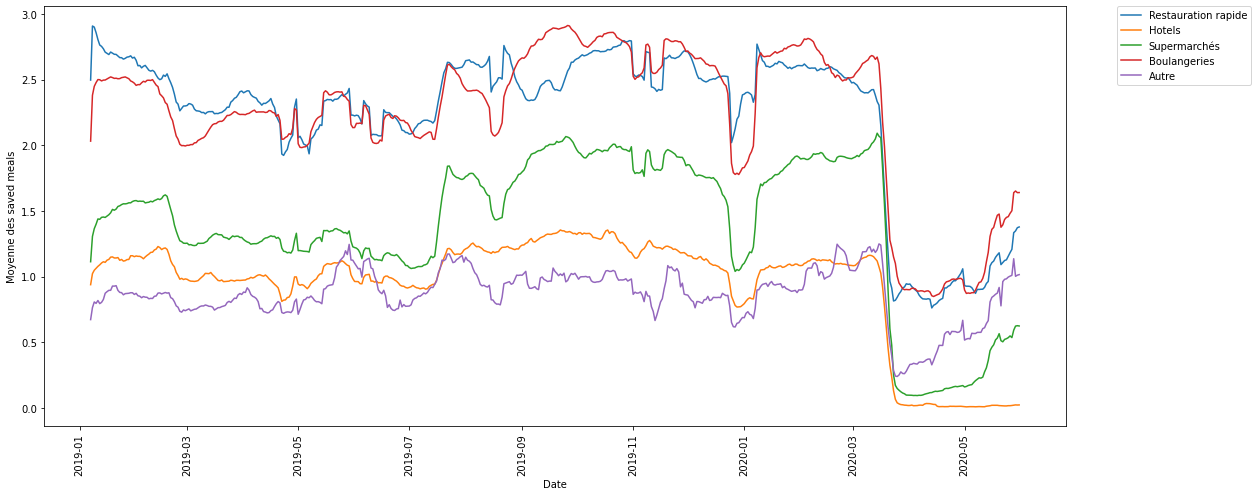

In [208]:
plt.figure(figsize=(15,7)) 

ax1 = plt.plot(pd.to_datetime(df_mean.index), df_mean_restauration_rapide['moyenne_mobile'], label='Restauration rapide') 
ax2 = plt.plot(pd.to_datetime(df_mean.index), df_mean_hotel['moyenne_mobile'], label='Hotels') 
ax3 = plt.plot(pd.to_datetime(df_mean.index), df_mean_supermarché['moyenne_mobile'], label='Supermarchés') 
ax4 = plt.plot(pd.to_datetime(df_mean.index), df_mean_boulangerie['moyenne_mobile'], label='Boulangeries') 
ax5 = plt.plot(pd.to_datetime(df_mean.index), df_mean_autres['moyenne_mobile'], label='Autre') 


plt.ylabel("Moyenne des saved meals")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)